<a href="https://colab.research.google.com/github/sameepshrestha/Assignments/blob/main/Assignment_character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

In [ ]:
import matplotlib.pyplot as plt 
import cv2 as cv 
import numpy as np
import easyocr
#character recognition using easyocr

Rather than training a model, using a pretrained model seems more fair


In [ ]:
image = cv.imread('/content/images (1).jfif',cv.IMREAD_GRAYSCALE)
image2 = cv.imread('/content/images (1).jfif')

sometimes the combination of the preprocessing matters for example we have two images A and B  for image A correct prediction is made with gaussian and then thresholding and for image B the correct prediction is made with median and then thresholdin 

so the function preprocess loads the different combination of preprocessing and selects the one with the highest probability 

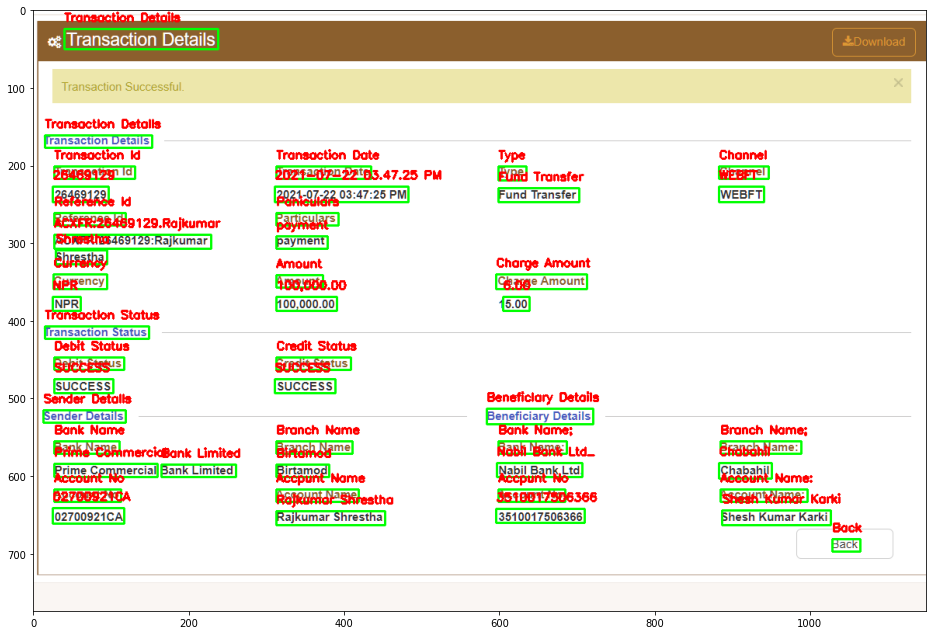

In [ ]:
def filters(img):
    filter1 = cv.bilateralFilter(img,9,55,55)
    filter2 = cv.GaussianBlur(img, (5, 5), 0)
    # filter3= cv.medianBlur(img,3)
    return filter1, filter2

def threshold(img):
    ret,thresh1 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    thresh2=cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 35, 3)
    return thresh1,thresh2
def plot(image_path,datas):
    image = cv.imread(image_path,cv.IMREAD_COLOR)
    for (bbox, text, prob) in datas: 
    # unpack the bounding box
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        tr = (int(tr[0]), int(tr[1]))
        br = (int(br[0]), int(br[1]))
        bl = (int(bl[0]), int(bl[1]))
        cv.rectangle(image, tl, br, (0, 255, 0), 2)
        cv.putText(image, text, (tl[0], tl[1] - 10),
        cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    plt.rcParams['figure.figsize'] = (16,16)
    plt.imshow(image)

def preprocess(image_path):
    image = cv.imread(image_path,cv.IMREAD_GRAYSCALE)
    predictions=[image]
    filter= filters(image)
    for fill in filter:
        thresholds = threshold(fill)
        for x in thresholds:
            predictions.append(x) 
    predictions = [reader.readtext(thresh) for thresh in predictions]
    b=[]
    for i in predictions:
        a=0
        for j in i:
            a=a+j[2]
        b.append(a/len(i))
    a=np.argmax((np.array(b)))
    plot(image_path,predictions[a])
    # return predictions[a]
image_path = '/content/shesh.PNG'
a = preprocess(image_path)

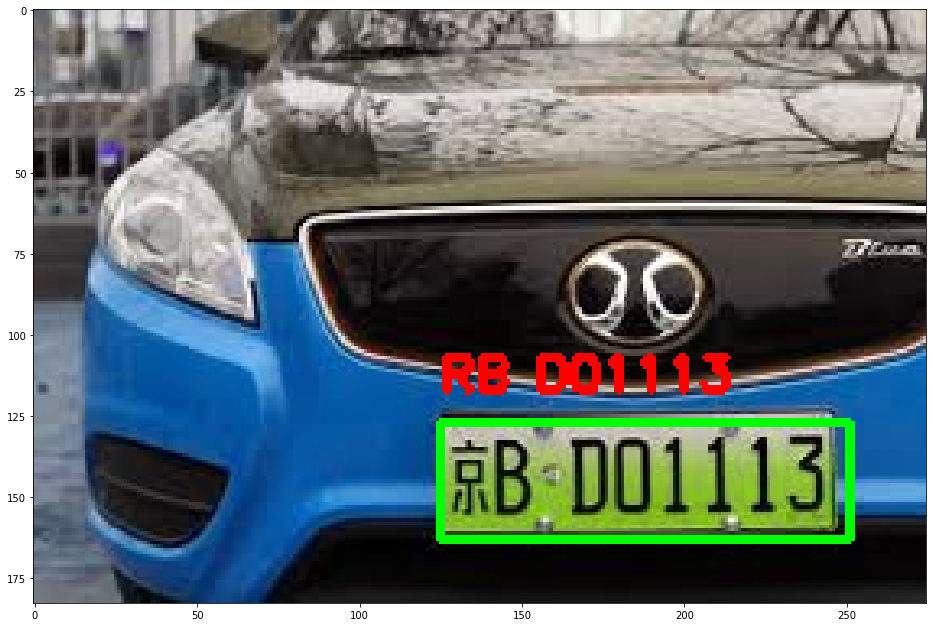

In [ ]:
preprocess('/content/images.jfif')

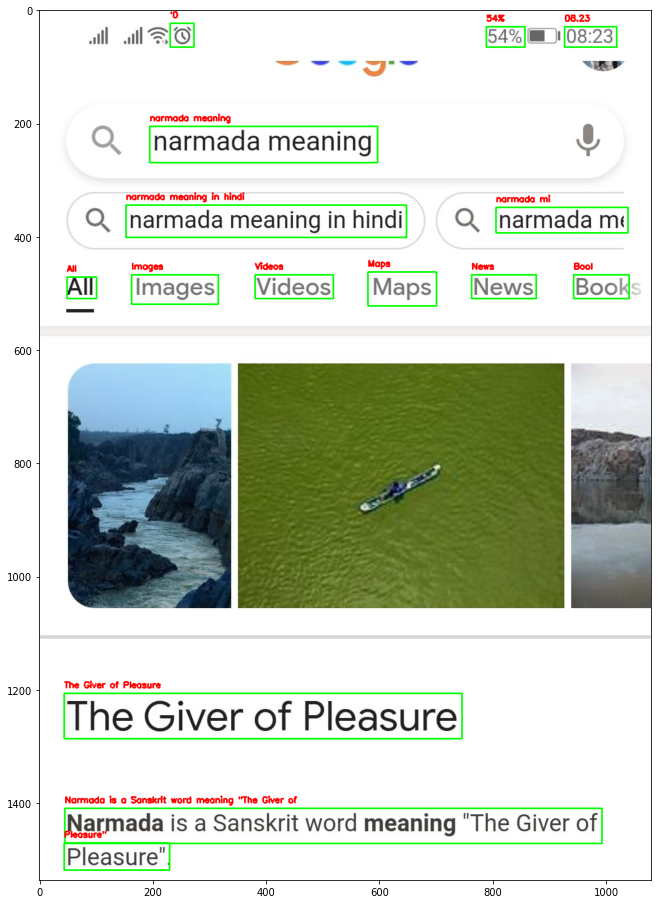

In [ ]:
preprocess('/content/177435236_309711307339182_3696142495245410656_n.jpg')